In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

from scipy.stats import ttest_ind

import trompy as tp

In [2]:
folder = "/mnt/d/TestData/fostrap/FTIG"
folder = "D:\\TestData\\fostrap\\FTIG"
folder = "..\\data"

In [3]:
def tweak_meta(df):
    return (df
           .drop(['folder', 'slide1A', 'slide1B', 'slide1C'], axis=1)
           .set_index("animal")
           )

def tweak_rois(df, df_meta):
    return (df
            .drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)
            .drop_duplicates()
            .join(df_meta, on="animal")
            .replace({"malt ": "malt"})
            .assign(region=lambda df_: df_.region.astype("category"),
                    diet=lambda df_: df_.diet.astype("category"),
                    sex=lambda df_: df_.sex.astype("category"),
                    infusion1=lambda df_: df_.infusion1.astype("category"),
                    infusion2=lambda df_: df_.infusion2.astype("category"),
                    density_fos=lambda df_: df_.nfos / df_.area * 100000,
                    density_trap=lambda df_: df_.ntrap / df_.area * 100000,
                    density_coloc=lambda df_: df_.ncoloc / df_.area * 100000,
                    pc_fos_coloc=lambda df_: df_.ncoloc / df_.nfos * 100,
                    pc_trap_coloc=lambda df_: df_.ncoloc / df_.ntrap * 100
                   )
           )

df_meta = pd.read_csv(os.path.join(folder, "metafile_ftig.csv"))
df_meta = tweak_meta(df_meta)

df = pd.read_csv(os.path.join(folder, "df_user_counts.csv"))
df = tweak_rois(df, df_meta)
df.sample(5)

,animal,section,region,area,nfos,ntrap,ncoloc,diet,sex,infusion1,infusion2,density_fos,density_trap,density_coloc,pc_fos_coloc,pc_trap_coloc
2432,FT154,s011,pvhypo,21297,10,5,1,PR,female,casein,casein,46.954970,23.477485,4.695497,10.000000,20.000000
397,FT109,s012,lathypo,152199,56,21,9,PR,male,casein,malt,36.793934,13.797725,5.913311,16.071429,42.857143
1134,FT127,s003,caudateput,754767,38,22,0,NR,male,casein,water,5.034666,2.914807,0.000000,0.000000,0.000000
1918,FT144,s004,piriform,206001,45,25,7,NR,female,casein,malt,21.844554,12.135863,3.398042,15.555556,28.000000
942,FT118,s014,arcuate,33361,0,8,0,NR,male,casein,casein,0.000000,23.980097,0.000000,NaN,0.000000


In [4]:
df.infusion2.unique()

['casein', 'water', 'malt']
Categories (3, object): ['casein', 'malt', 'water']

In [5]:
# these animals are in the metafile but not in the CSV file - check why
[id for id in df_meta.index if id not in df["animal"].unique()]

['FT132', 'FT156', 'FT160']

In [6]:
df["animal"].unique()

array(['FT102', 'FT103', 'FT104', 'FT105', 'FT106', 'FT108', 'FT109',
       'FT110', 'FT111', 'FT112', 'FT114', 'FT116', 'FT118', 'FT119',
       'FT120', 'FT126', 'FT127', 'FT128', 'FT131', 'FT133', 'FT134',
       'FT136', 'FT137', 'FT138', 'FT139', 'FT140', 'FT141', 'FT144',
       'FT145', 'FT147', 'FT148', 'FT149', 'FT150', 'FT151', 'FT153',
       'FT154', 'FT155', 'FT157', 'FT161', 'FT162', 'FT163', 'FT164',
       'FT166', 'FT167', 'FT168'], dtype=object)

In [7]:
df.groupby(by=["region", "diet", "animal", "infusion2"]).mean(numeric_only=True).to_csv(os.path.join("..\\results", "grouped.csv"))

In [8]:
df.groupby(by=["region", "diet", "infusion2"]).mean(numeric_only=True).to_csv(os.path.join("..\\results", "grouped_mean.csv"))

In [9]:
df.groupby(by=["region", "diet"]).mean(numeric_only=True).to_csv(os.path.join("..\\results", "grouped_mean_noinf2.csv"))

In [10]:
df.groupby(by=["region", "infusion2"]).mean(numeric_only=True).to_csv(os.path.join("..\\results", "grouped_mean_byinf.csv"))

In [11]:
df.groupby(by=["region", "infusion2", "animal"]).mean(numeric_only=True).to_csv(os.path.join("..\\results", "grouped_byinf.csv"))

In [12]:
df_grouped = df.groupby(by=["region", "diet", "animal", "infusion2"]).mean(numeric_only=True).dropna()

In [13]:
region_names = ["arcuate", "caudate putamen", "lateral hypothalamus", "nucleus accumbens core", "nucleus accumbens shell",
               "piriform cortex", "paraventricular nucleus of hypothalamus", "paraventricular nucleus of thalamus"]

arcuate Ttest_indResult(statistic=2.8321801951676755, pvalue=0.007355442889764758)
caudateput Ttest_indResult(statistic=2.2839001493390008, pvalue=0.02762724877294883)
lathypo Ttest_indResult(statistic=1.4337846609981642, pvalue=0.15940509593392801)
naccore Ttest_indResult(statistic=2.5076728114973728, pvalue=0.016206106980780358)
nacshell Ttest_indResult(statistic=2.451274875686549, pvalue=0.018586074168535586)
piriform Ttest_indResult(statistic=1.266640541943241, pvalue=0.21243255394045144)
pvhypo Ttest_indResult(statistic=2.6184075696493534, pvalue=0.012514171220079601)
pvthal Ttest_indResult(statistic=1.3273599900804982, pvalue=0.1919161902399834)


Text(0.5, 0, 'Density of trapped neurons')

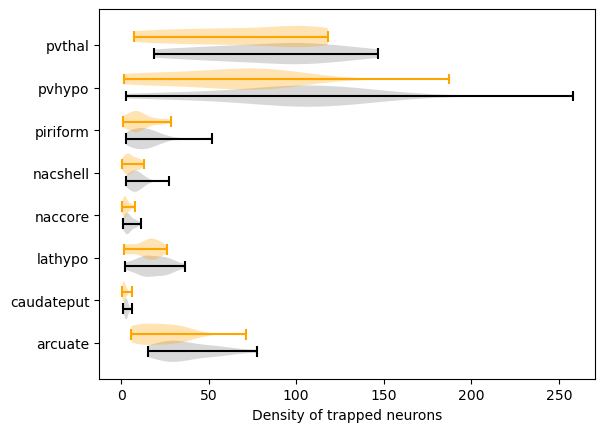

In [14]:
spacing=0.2
regions = df_grouped.index.get_level_values(0).unique().values

f, ax = plt.subplots()
for idx, region in enumerate(regions):

    temp_df = df_grouped["density_trap"].loc[region]
    
    NR = temp_df.loc["NR"].values
    PR = temp_df.loc["PR"].values

    NR_violin = ax.violinplot(NR, positions=[idx-spacing], vert=False)
    PR_violin = ax.violinplot(PR, positions=[idx+spacing], vert=False)
    
    for vp in NR_violin["bodies"]:
        vp.set_facecolor("grey")
        
    for vp in PR_violin["bodies"]:
        vp.set_facecolor("orange")
    
    for partname in ("cbars", "cmins", "cmaxes"):
        NR_violin[partname].set_edgecolor("black")
        PR_violin[partname].set_edgecolor("orange")
        
    print(region, ttest_ind(NR,PR))


ax.set_yticks(range(0,8))
ax.set_yticklabels([str(x) for x in df_grouped.index.get_level_values(0).unique()])

ax.set_xlabel("Density of trapped neurons")

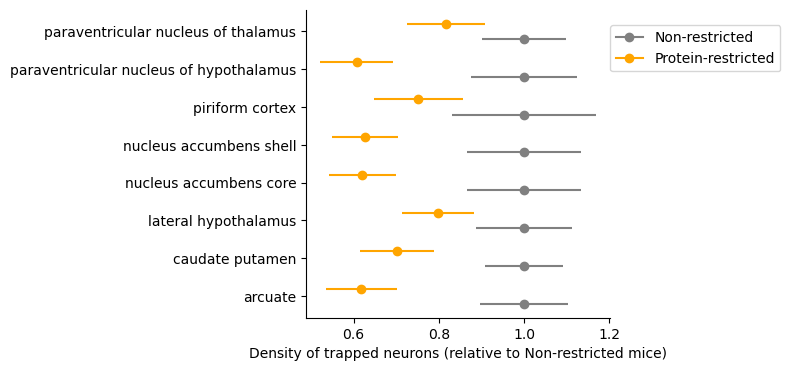

In [15]:
# try to rewrite with regions plotted in order of mean

spacing=0.2
regions = df_grouped.index.get_level_values(0).unique().values

NR_lines, PR_lines = [], []

f, ax = plt.subplots(figsize=(8,4), gridspec_kw={"left":0.4, "right":0.78})
for idx, region in enumerate(regions):

    temp_df = df_grouped["density_trap"].loc[region]
    
    NR = temp_df.loc["NR"].values
    PR = temp_df.loc["PR"].values
    
    NR_scaled = NR / np.mean(NR)
    PR_scaled = PR / np.mean(NR)
    
    NR_mean, NR_sem = tp.mean_and_sem(NR_scaled)
    PR_mean, PR_sem = tp.mean_and_sem(PR_scaled)
    
    NR_lines.append(ax.errorbar(NR_mean, idx-spacing, xerr=NR_sem, marker="o", color="grey"))
    PR_lines.append(ax.errorbar(PR_mean, idx+spacing, xerr=PR_sem, marker="o", color="orange"))

ax.set_yticks(range(0,8))

ax.set_yticklabels([str(x) for x in df_grouped.index.get_level_values(0).unique()])
ax.set_yticklabels(region_names)

ax.set_xlabel("Density of trapped neurons (relative to Non-restricted mice)")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.legend([NR_lines[0][0], PR_lines[0][0]], ["Non-restricted", "Protein-restricted"], loc=(1,0.8))

f.savefig(os.path.join("..\\results", "trapped_density.png"))


In [15]:
df_inf = df.groupby(by=["region", "infusion2", "animal"]).mean(numeric_only=True).dropna()

In [16]:
df_inf

area       nfos      ntrap     ncoloc  \
region  infusion2 animal                                                  
arcuate casein    FT104   26813.500000   6.500000   8.250000   0.750000   
                  FT116   21467.500000   5.500000   2.250000   0.750000   
                  FT118   30243.666667   2.333333  17.000000   0.666667   
                  FT120   21730.666667   3.000000   5.833333   0.833333   
                  FT126   23079.500000   4.000000   4.500000   0.750000   
...                                ...        ...        ...        ...   
pvthal  water     FT150   43944.571429  46.642857  59.928571  16.571429   
                  FT153   38588.200000  41.700000   9.000000   2.400000   
                  FT155   42176.833333  56.166667  32.583333  10.666667   
                  FT157   45620.285714  57.428571  27.285714   8.928571   
                  FT167   34225.666667   8.500000   6.333333   1.416667   

                          density_fos  density_trap  density_coloc  \
region  infusion2 animal                                             
arcuate casein    FT104     21.612007     32.250430       2.614011   
                  FT116     26.449297     11.324868       3.737905   
                  FT118      7.472910     58.936091       2.288343   
                  FT120     14.158720     26.032235       3.772618   
                  FT126     18.477266     19.877427       3.611970   
...                               ...           ...            ...   
pvthal  water     FT150    118.904549    146.832640      41.418731   
                  FT153    112.597876     23.742090       5.606194   
                  FT155    132.530176     78.236946      23.916225   
                  FT157    139.089617     59.773271      19.225106   
                  FT167     18.713743     14.049436       3.094952   

                          pc_fos_coloc  pc_trap_coloc  
region  infusion2 animal                               
arcuate casein    FT104      11.666667       8.116883  
                  FT116      17.500000      27.777778  
                  FT118      43.055556       3.266178  
                  FT120      29.166667      11.435185  
                  FT126      11.250000      12.500000  
...                                ...            ...  
pvthal  water     FT150      36.285197      28.149124  
                  FT153       5.054761      23.393939  
                  FT155      17.853375      31.698577  
                  FT157      14.608609      32.361577  
                  FT167      13.952840      20.116809  

[337 rows x 9 columns]

arcuate Ttest_indResult(statistic=-0.5044687307926281, pvalue=0.6260509101811116)
caudateput Ttest_indResult(statistic=2.7391925896338742, pvalue=0.017958187158222883)
lathypo Ttest_indResult(statistic=1.135641609922982, pvalue=0.2802446620867518)
naccore Ttest_indResult(statistic=-0.9741861756158772, pvalue=0.34919349986450077)
nacshell Ttest_indResult(statistic=-0.18441300478768344, pvalue=0.85676925334224)
piriform Ttest_indResult(statistic=1.3432630029985404, pvalue=0.20403951196990297)
pvhypo Ttest_indResult(statistic=1.3539204480928335, pvalue=0.20556721633875874)
pvthal Ttest_indResult(statistic=1.5140438691725036, pvalue=0.15820590964480866)


Text(0.5, 0, 'Percent of trapped neurons with cfos')

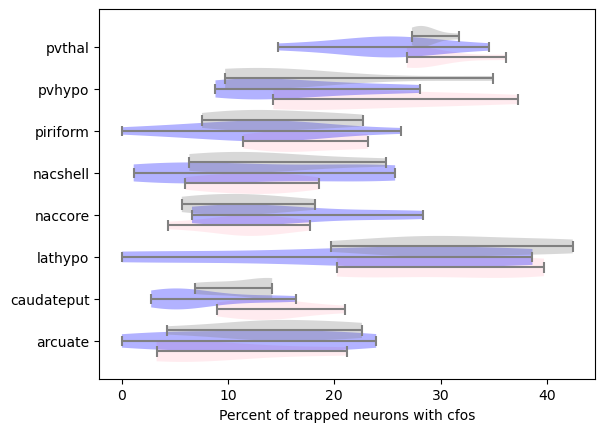

In [26]:
# Breakdown by second infusion for non-restricted mice

df_inf = df.groupby(by=["region", "diet", "infusion2", "animal"]).mean(numeric_only=True).dropna()

spacing=0.25
regions = df_inf.index.get_level_values(0).unique().values

f, ax = plt.subplots()
for idx, region in enumerate(regions):

    temp_df = df_inf["pc_trap_coloc"].loc[region].loc["NR"]
    
    cas = temp_df.loc["casein"].values
    malt = temp_df.loc["malt"].values
    water = temp_df.loc["water"].values

    cas_violin = ax.violinplot(cas, positions=[idx-spacing], vert=False)
    malt_violin = ax.violinplot(malt, positions=[idx], vert=False)
    water_violin = ax.violinplot(water, positions=[idx+spacing], vert=False)
    
    for vp in cas_violin["bodies"]:
        vp.set_facecolor("pink")
        
    for vp in malt_violin["bodies"]:
        vp.set_facecolor("blue")
        
    for vp in water_violin["bodies"]:
        vp.set_facecolor("gray")
    
    for partname in ("cbars", "cmins", "cmaxes"):
        cas_violin[partname].set_edgecolor("grey")
        malt_violin[partname].set_edgecolor("grey")
        water_violin[partname].set_edgecolor("grey")
        
    print(region, ttest_ind(cas, malt))
    
ax.set_yticks(range(0,8))
ax.set_yticklabels([str(x) for x in df_grouped.index.get_level_values(0).unique()])

ax.set_xlabel("Percent of trapped neurons with cfos")

arcuate Ttest_indResult(statistic=0.8472528519737544, pvalue=0.4121810285546599)
caudateput Ttest_indResult(statistic=-0.8042317453160519, pvalue=0.43572396728884666)
lathypo Ttest_indResult(statistic=0.7115547875761025, pvalue=0.48931287151987857)
naccore Ttest_indResult(statistic=0.3154167785570232, pvalue=0.7574514396140646)
nacshell Ttest_indResult(statistic=-0.12247999517647824, pvalue=0.9043920763154497)
piriform Ttest_indResult(statistic=0.6101909787545403, pvalue=0.5522532710898265)
pvhypo Ttest_indResult(statistic=1.187900464372767, pvalue=0.25612321310553626)
pvthal Ttest_indResult(statistic=2.3120507825404304, pvalue=0.037803540132379784)


Text(0.5, 0, 'Percent of trapped neurons with cfos')

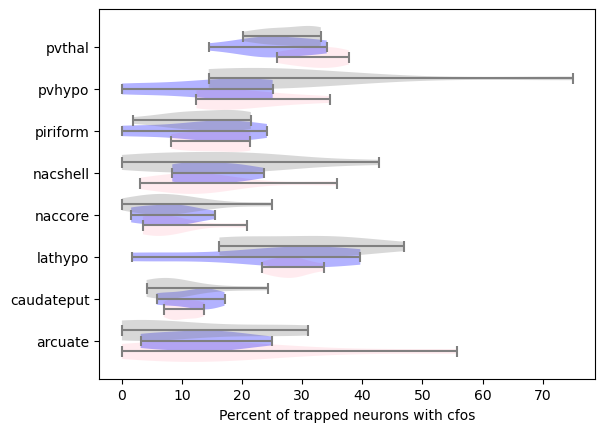

In [27]:
# Breakdown by second infusion for protein-restrcited mice

df_inf = df.groupby(by=["region", "diet", "infusion2", "animal"]).mean(numeric_only=True).dropna()

spacing=0.25
regions = df_inf.index.get_level_values(0).unique().values

f, ax = plt.subplots()
for idx, region in enumerate(regions):

    temp_df = df_inf["pc_trap_coloc"].loc[region].loc["PR"]
    
    cas = temp_df.loc["casein"].values
    malt = temp_df.loc["malt"].values
    water = temp_df.loc["water"].values

    cas_violin = ax.violinplot(cas, positions=[idx-spacing], vert=False)
    malt_violin = ax.violinplot(malt, positions=[idx], vert=False)
    water_violin = ax.violinplot(water, positions=[idx+spacing], vert=False)
    
    for vp in cas_violin["bodies"]:
        vp.set_facecolor("pink")
        
    for vp in malt_violin["bodies"]:
        vp.set_facecolor("blue")
        
    for vp in water_violin["bodies"]:
        vp.set_facecolor("gray")
    
    for partname in ("cbars", "cmins", "cmaxes"):
        cas_violin[partname].set_edgecolor("grey")
        malt_violin[partname].set_edgecolor("grey")
        water_violin[partname].set_edgecolor("grey")
        
    print(region, ttest_ind(cas, malt))
    
ax.set_yticks(range(0,8))
ax.set_yticklabels([str(x) for x in df_grouped.index.get_level_values(0).unique()])

ax.set_xlabel("Percent of trapped neurons with cfos")

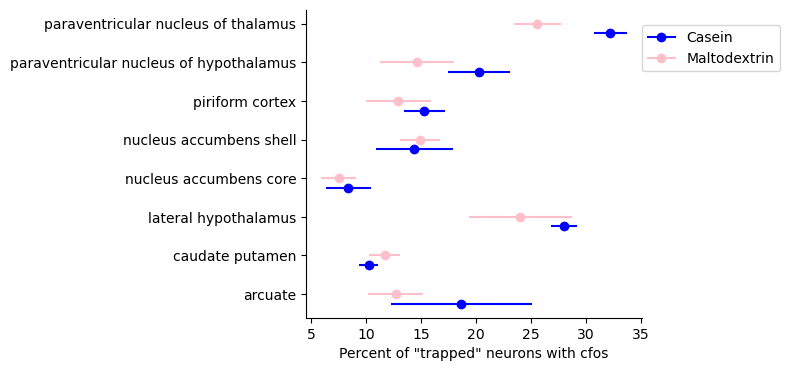

In [13]:
# Breakdown by second infusion for protein-restrcited mice

df_inf = df.groupby(by=["region", "diet", "infusion2", "animal"]).mean(numeric_only=True).dropna()

spacing=0.25
regions = df_inf.index.get_level_values(0).unique().values

cas_lines, malt_lines, water_lines = [], [], []

f, ax = plt.subplots(figsize=(8,4), gridspec_kw={"left":0.4, "right":0.82})
for idx, region in enumerate(regions):

    temp_df = df_inf["pc_trap_coloc"].loc[region].loc["PR"]
    
    cas = temp_df.loc["casein"].values
    malt = temp_df.loc["malt"].values
    water = temp_df.loc["water"].values
    
    cas_lines.append(ax.errorbar(np.mean(cas), idx-spacing, xerr=tp.mean_and_sem(cas)[1], marker="o", color="blue", label="Casein"))
    malt_lines.append(ax.errorbar(np.mean(malt), idx, xerr=tp.mean_and_sem(malt)[1], marker="o", color="pink"))
#     water_lines.append(ax.errorbar(np.mean(water), idx+spacing, xerr=tp.mean_and_sem(water)[1], marker="o", color="grey"))
           
#     print(region, ttest_ind(cas, malt))
    
ax.set_yticks(range(0,8))
ax.set_yticklabels(region_names)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_xlabel('Percent of "trapped" neurons with cfos')

# ax.legend([cas_lines[0][0], malt_lines[0][0], water_lines[0][0]], ["Casein", "Maltodextrin", "Water"],loc=(1,0.8))
ax.legend([cas_lines[0][0], malt_lines[0][0]], ["Casein", "Maltodextrin"],loc=(1,0.8))

f.savefig(os.path.join("..\\results", "pc_coloc_by_inf.png"))

In [67]:
ax.legend?

In [75]:
cas_lines[0][0]


In [166]:
temp_df = df_inf["pc_trap_coloc"].xs("NR", level=1, drop_level=True)
temp_df.head()

region   infusion2  animal
arcuate  casein     FT104      8.116883
                    FT118      3.266178
                    FT128     21.233193
         malt       FT110      4.788360
                    FT111     13.395722
Name: pc_trap_coloc, dtype: float64